# Mini project 1 - Basic Data Analytics with Pandas

In the first week, we’ll practice data exploration and data analysis in Python with a real-world dataset – Sberbank data, which is available in the [Sberbank Russian Housing Market Kaggle competition](https://www.kaggle.com/c/sberbank-russian-housing-market). Sberbank dataset contains rich and messy data about Russian's housing market. This real-world data will provide you concrete practices for getting started with python. 

This step-by-step mini project will cover the most essential and useful techniques for data analysis in solving a real-world problem with key Python data analysis libraries: pandas and numpy. We’ll go through data loading and data frame creation, selection and query, grouping and function applying, plotting and writing data to file. 

In [2]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Question 1: Read the train set and test set of Sberbank dataset from the train.csv and test.csv, and call them train_data and test_data. **

Hint: You can read data from a CSV file using the read_csv function in pandas. By default, it assumes that the fields are comma-separated.

In [3]:
train = pd.read_csv("all/train.csv")
test = pd.read_csv("all/test.csv")

** Question 2: Merge train and test to one dataframe and call it full_data. **

Hint: The new dataframe should have the rows from train_data followed by rows from test_data. Refer to [merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html). 

In [4]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [6]:
train.shape

(30471, 292)

In [7]:
test.shape

(7662, 291)

In [8]:
# concat is join rows
full_data = pd.concat([train, test])

***For the rest questions, if not specified, we'll do practice on train_data. Let's create a dataframe called df from train_data.***

In [9]:
df = train

** Question 3: Preview the first 10 columns with head().**

Hint: You can change the number of rows displayed by specifying a number. There is a similar function tail(), which will show you the last columns of a dataframe.

In [10]:
df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


**Question 4: How many columns and rows are there in the data?**

In [11]:
df.shape

(30471, 292)

30471 rows, 292 columns

**Question 5: Which features are available in the data? Display the features.**

Hint: The features are the column names. You can print them out.

In [12]:
df.columns.values

array(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'full_all',
       'male_f', 'female_f', 'young_all', 'young_male',

**Question 6: What's the data type of each column? Save the datatype as data_type.**

In [13]:
df.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [14]:
data_type = df.dtypes

**Question 7: Which variables are numerical variables (excluding 'id')? Put all the numerical variable in list.**

Hint: Use the index of the data_type we just created in Q5. The data type of numerical variables should be int or float. Remenber to remove the 'id'.

In [15]:
num_vars = list(df.dtypes[df.dtypes=='int64'].index) + list(df.dtypes[df.dtypes=='float64'].index)

In [16]:
num_vars

['id',
 'full_sq',
 'raion_popul',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'ID_metro',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal',
 'office_count_500',
 'office_sqm_500',
 'trc_count_500',
 'trc_sqm_500',
 'cafe_count_500',
 'cafe_count_500_

**Question 8: Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data. **

Hint: You can find out several ways to solve this question. 

In [17]:
#first 3 rows
#df[:3]
# df.loc[:3]

In [18]:
df[:5][['id','price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


**Question 9: Select the rows with the full area larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'.**

Hint: You can use boolean indexing or query. Try both methods.

In [19]:
df[(df.full_sq>10) & (df.full_sq<1500)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


**Question 10: Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.**

In [20]:
sq_index = df.query('full_sq<life_sq').index
df.loc[sq_index, 'life_sq'] = np.NAN

** Question 11: Check how many rows in life_sq are NAN? **

In [21]:
df.life_sq.isnull().sum()

6420

**Question 12: The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?**

In [22]:
df.product_type.value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

**Question 13: Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.**

Hint: First select the two columns, then group and aggregate. If you choose .aggragate() method, use np.median for the median calculation.

In [23]:
df[['product_type','price_doc']].groupby('product_type').median()

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


** Question 14: Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped**

In [24]:
grouped = df.groupby(['product_type','state']).size()

In [25]:
grouped

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

**Question 15: Unstack the state index in grouped.**

Hint: Use unstack() to turn the index values in state into column names.

In [26]:
grouped.unstack('state')

state,1.0,2.0,3.0,4.0,33.0
product_type,,,,,
Investment,520.0,5802.0,5653.0,413.0,1.0
OwnerOccupier,4335.0,42.0,137.0,9.0,NaN


**Question 16: Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.**


In [27]:
df.roomsize = df.life_sq / df.num_room

In [31]:
df.roomsize.describe()

count    1.673200e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.433333e+01
50%      1.600000e+01
75%      1.900000e+01
max               inf
dtype: float64

**Quesion 17: Change the format of timestamp to '%Y-%m-%d'. **

Hint: For more info about timestamp in pandas, read [this document](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). 

In [40]:
df.timestamp = pd.to_datetime(df.timestamp, format='%Y-%m-%d')

**Question 18: Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week.**

Hint: you can use apply() to apply functions to the data.

In [42]:
df['year'] = df.timestamp.dt.year
df['dayofweek'] = df.timestamp.dt.weekday_name
df.loc[0:5,['timestamp','year','dayofweek']]

,timestamp,year,dayofweek
0,2011-08-20,2011,Saturday
1,2011-08-23,2011,Tuesday
2,2011-08-27,2011,Saturday
3,2011-09-01,2011,Thursday
4,2011-09-05,2011,Monday
5,2011-09-06,2011,Tuesday


**Question 19: Draw histogram of price to see the distribution.**

Hint: You can use matplotlib or pandas for this histogram. 

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


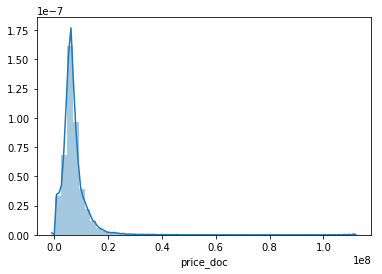

In [45]:
import seaborn as sns
sns.distplot(df.price_doc)

**Question 20: From the plot in Q15, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.**

In [46]:
df['log_price'] = np.log(df.price_doc.values)

** Question 21: Drop the log_price column.**

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


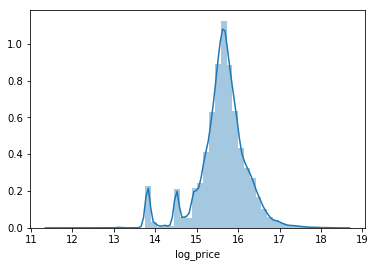

In [47]:
sns.distplot(df.log_price)

In [48]:
df.drop('log_price',axis=1,inplace=True)

**Question 22: Save the dataframe we have now to train_new.csv file**

In [49]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,year,dayofweek
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0,13,22,1,0,52,4,5850000,2011,Saturday
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0,15,29,1,10,66,14,6000000,2011,Tuesday
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,11,27,0,4,67,10,5700000,2011,Saturday
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,1,4,4,0,0,26,3,13100000,2011,Thursday
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,17,135,236,2,91,195,14,16331452,2011,Monday


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 294 entries, id to dayofweek
dtypes: datetime64[ns](1), float64(119), int64(158), object(16)
memory usage: 68.3+ MB


**Now you've finished basic data processing for Sberbank dataset.**

In [51]:
df.to_csv("new_train.csv")